In [1]:
#Decision Tree
 
#Assignment


#About the data: 
#Let’s consider a Company dataset with around 10 variables and 400 records.

#The attributes are as follows: 
    
# Sales -- Unit sales (in thousands) at each location

# Competitor Price -- Price charged by competitor at each location

# Income -- Community income level (in thousands of dollars)

# Advertising -- Local advertising budget for company at each location (in thousands of dollars)

# Population -- Population size in region (in thousands)

# Price -- Price company charges for car seats at each site

# Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

# Age -- Average age of the local population

# Education -- Education level at each location

# Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

# US -- A factor with levels No and Yes to indicate whether the store is in the US or not

#The company dataset looks like this: 
 
#Problem Statement:
    
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

#Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
st=pd.read_csv("E:\\Excelr\\Assignments\\Assignments DS\\Decision Tree\\Company_Data.csv")
st.head(4)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes


In [4]:
st.shape

(400, 11)

In [5]:
st['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [6]:
#Converting the sales column into categorical variable
sales_val = []
for value in st["Sales"]:
    if value<=7.40:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
st["sales_val"]= sales_val

In [7]:
st.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,high


In [8]:
#dropping the sales column
st=st.drop(['Sales'], axis=1)

In [9]:
st.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low


In [10]:
#checkingb for na values
st.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_val      0
dtype: int64

In [11]:
st.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

In [12]:
#preparing the data
X = st.drop('sales_val', axis=1)
y = st['sales_val']

In [13]:
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])


x1 = encoder.fit_transform(X)


In [14]:
x1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x1= scaler.fit_transform(x1)

In [16]:
x2 = pd.DataFrame(x1, columns=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'])

In [17]:
x2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.65,0.082902,0.500000,0.015414,0.096774,-2.0,-0.476190,0.75,0.0,0.0
1,-0.70,-0.435233,0.916667,-0.046243,-1.096774,-1.0,0.400000,-1.00,0.0,0.0
2,-0.60,-0.704663,0.416667,-0.011561,-1.193548,0.0,0.171429,-0.50,0.0,0.0
3,-0.40,0.642487,-0.083333,0.747592,-0.645161,0.0,0.019048,0.00,0.0,0.0
4,0.80,-0.103627,-0.166667,0.262042,0.354839,-2.0,-0.628571,-0.25,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
395,0.65,0.808290,1.000000,-0.265896,0.354839,-1.0,-0.819048,0.00,0.0,0.0
396,0.70,-0.953368,-0.166667,-0.905588,0.096774,0.0,0.019048,-0.75,1.0,0.0
397,1.85,-0.891192,0.583333,0.369942,1.354839,0.0,-0.552381,1.00,0.0,0.0
398,-1.25,0.207254,0.166667,0.046243,-0.709677,-2.0,-0.171429,-0.50,0.0,0.0


In [18]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)


In [19]:
#Decision tree classifier with gini index
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)


# fit the model
clf_gini.fit(x2_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [21]:
y_pred = clf_gini.predict(x2_test)

In [22]:
#Accuracy check for test
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7375


In [23]:
#comparing the train and test accuracy
y_pred_train = clf_gini.predict(x2_train)


In [24]:
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training accuracy score: 0.8969


In [25]:
#checking for under and overfitting
print('Training score: {:.4f}'.format(clf_gini.score(x2_train, y_train)))

print('Test score: {:.4f}'.format(clf_gini.score(x2_test, y_test)))
#both the values are similar there exists overfitting in the data

Training score: 0.8969
Test score: 0.7375


[Text(395.25, 504.7714285714286, 'X[4] <= -0.79\ngini = 0.5\nsamples = 320\nvalue = [162, 158]'),
 Text(186.0, 427.11428571428576, 'X[5] <= -1.5\ngini = 0.124\nsamples = 45\nvalue = [42, 3]'),
 Text(139.5, 349.4571428571429, 'X[3] <= -0.013\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(93.0, 271.8, 'X[3] <= -0.642\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(46.5, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(139.5, 194.14285714285717, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(186.0, 271.8, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(232.5, 349.4571428571429, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(604.5, 427.11428571428576, 'X[5] <= -1.5\ngini = 0.492\nsamples = 275\nvalue = [120, 155]'),
 Text(372.0, 349.4571428571429, 'X[0] <= 1.3\ngini = 0.281\nsamples = 65\nvalue = [11, 54]'),
 Text(325.5, 271.8, 'X[2] <= 0.875\ngini = 0.225\nsamples = 62\nvalue = [8, 54]'),
 Text(232.5, 194.14285714285717, 'X[4] <= -0.468\ngini = 0.15

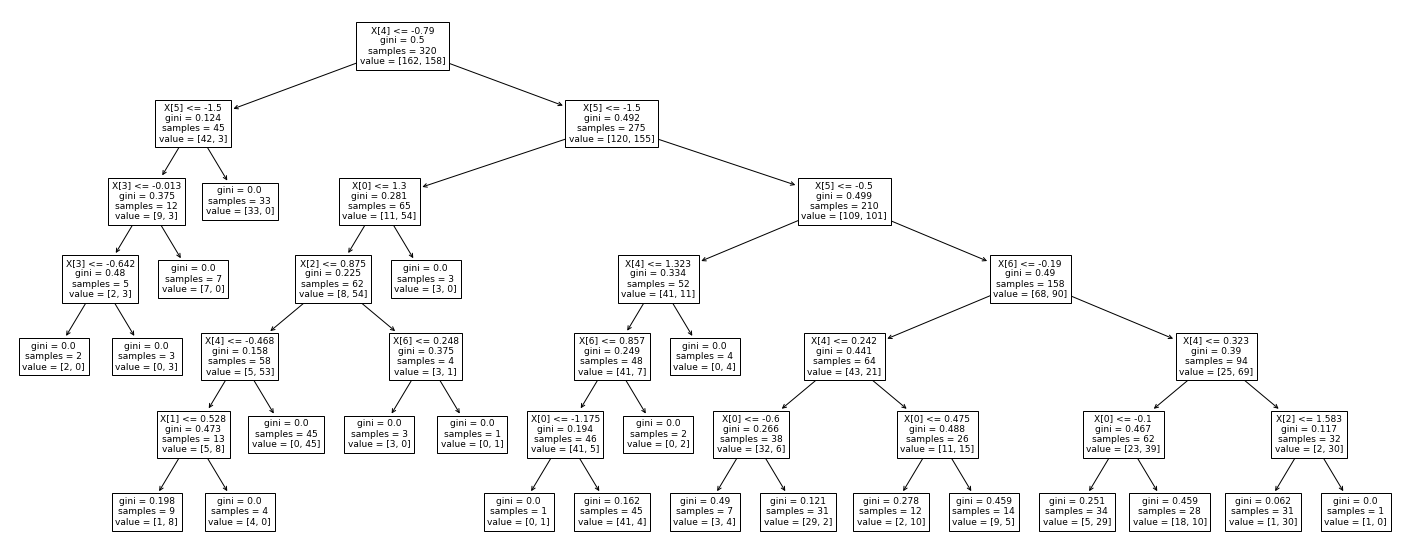

In [26]:
#visualize the decision tree
plt.figure(figsize=(25,10))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x2_train, y_train))

In [27]:
#Decision tree classifier using criterion classifier
en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)


# fit the model
en.fit(x2_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [28]:
#test prediction
y_pred_en = en.predict(x2_test)

In [29]:
from sklearn.metrics import accuracy_score

print('Test accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Test accuracy : 0.6875


In [30]:
y_pred_train_en = en.predict(x2_train)
#train prediction

In [31]:
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training accuracy score: 0.8906


[Text(233.771484375, 504.7714285714286, 'X[4] <= -0.79\nentropy = 1.0\nsamples = 320\nvalue = [162, 158]'),
 Text(104.625, 427.11428571428576, 'X[5] <= -1.5\nentropy = 0.353\nsamples = 45\nvalue = [42, 3]'),
 Text(78.46875, 349.4571428571429, 'X[3] <= -0.013\nentropy = 0.811\nsamples = 12\nvalue = [9, 3]'),
 Text(52.3125, 271.8, 'X[3] <= -0.642\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(26.15625, 194.14285714285717, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(78.46875, 194.14285714285717, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(104.625, 271.8, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(130.78125, 349.4571428571429, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(362.91796875, 427.11428571428576, 'X[5] <= -1.5\nentropy = 0.988\nsamples = 275\nvalue = [120, 155]'),
 Text(209.25, 349.4571428571429, 'X[0] <= 1.3\nentropy = 0.656\nsamples = 65\nvalue = [11, 54]'),
 Text(183.09375, 271.8, 'X[1] <= 0.58\nentropy = 0.555\nsamples = 62\nvalue =

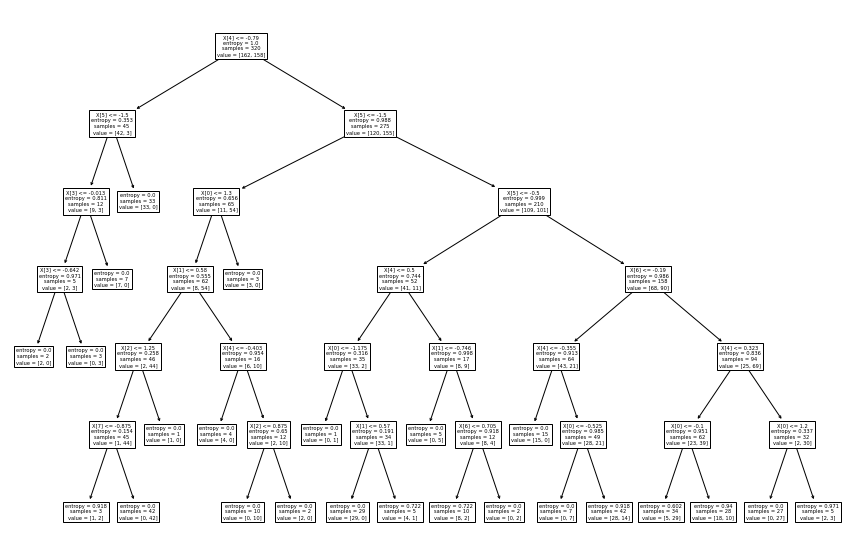

In [32]:
#visulizie the decision tree with criteron entropy
plt.figure(figsize=(15,10))

from sklearn import tree

tree.plot_tree(en.fit(x2_train, y_train)) 

In [33]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n\n ", confusion_matrix(y_test, y_pred_en))

Confusion Matrix:

  [[35  9]
 [16 20]]


In [34]:
#Classification report
from sklearn.metrics import classification_report
print("Report:\n", classification_report(y_test, y_pred_en))


Report:
               precision    recall  f1-score   support

        high       0.69      0.80      0.74        44
         low       0.69      0.56      0.62        36

    accuracy                           0.69        80
   macro avg       0.69      0.68      0.68        80
weighted avg       0.69      0.69      0.68        80



In [35]:
#feature engineering

x2_train_fe=x2_train.drop(['Advertising', 'Population','Education','Income','ShelveLoc'],axis=1)
x2_test_fe=x2_test.drop(['Advertising', 'Population','Education','Income','ShelveLoc'],axis=1)

In [36]:
#DecisionTreeClassifier model with criterion gini index

clf_gini_fe = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)


# fit the model
clf_gini_fe.fit(x2_train_fe, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [37]:
y_pred_train_fe = clf_gini_fe.predict(x2_train_fe)

In [38]:
y_pred_test_fe = clf_gini_fe.predict(x2_test_fe)

In [39]:
print('Training set score: {:.4f}'.format(clf_gini_fe.score(x2_train_fe, y_train)))

print('Test set score: {:.4f}'.format(clf_gini_fe.score(x2_test_fe, y_test)))

Training set score: 0.8125
Test set score: 0.7125


In [40]:
#DecisionTreeClassifier with entropy 

clf_en_fe = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)


# fit the model
clf_en_fe.fit(x2_train_fe, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [41]:
y_pred_train_en_fe = clf_en_fe.predict(x2_train_fe)

In [42]:
y_pred_test_en_fe = clf_en_fe.predict(x2_test_fe)

In [43]:
print('Training data: {:.4f}'.format(clf_en_fe.score(x2_train_fe, y_train)))

print('Test data: {:.4f}'.format(clf_en_fe.score(x2_test_fe, y_test)))

Training data: 0.8031
Test data: 0.6500


In [44]:
#XGB boosting technique
import xgboost as xgb
import pandas as pd


In [45]:
x3_train=x2_train
x3_test=x2_test
y1_test=y_test
y1_train=y_train

In [46]:
### Preparing XGB classifier 
xgb1 = xgb.XGBClassifier(objective ='reg:logistic', learning_rate = 0.1,
                max_depth = 5, n_estimators = 20)
xgb1.fit(x3_train,y1_train)
train_pred_xgb = xgb1.predict(x3_train)

In [47]:
import numpy as np
accuracy_train_data = np.mean(train_pred_xgb==y1_train) 
print(accuracy_train_data)

0.9625


In [48]:
test_pred_xgb=xgb1.predict(x3_test)

In [49]:
accuracy_test_data=np.mean(test_pred_xgb==y1_test)
print(accuracy_test_data)

0.7375


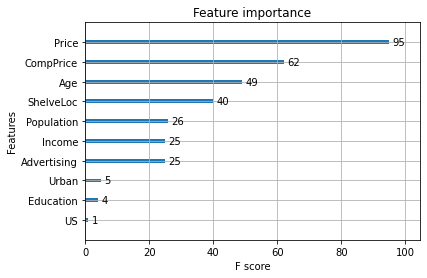

In [50]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)

In [51]:
#Xgb boosting with feature selection data
### Preparing XGB classifier 
xgb1_fe = xgb.XGBClassifier(n_estimators=30,learning_rate=0.3)
xgb1.fit(x2_train,y1_train)
fe_train_pred = xgb1.predict(x2_train)

In [53]:
import numpy as np
train_acc = np.mean(fe_train_pred==y1_train) 
print(train_acc)

0.9625


In [56]:
test_pred = xgb1.predict(x2_test)

In [57]:
test_acc = np.mean(test_pred==y1_test)
print(test_acc) #73.75

0.7375
